## Toolbox Loading

In [102]:
#Data Manipulation
import numpy as np
import pandas as pd
import re
import datetime
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import *
%matplotlib inline

In [103]:
#importing dataset
dataset = pd.read_csv(r'C:\Users\USER1\Desktop\Airplane_Crashes_and_Fatalities.csv')

## Data Exploration

In [104]:
#checking shape of dataset
dataset.shape

(4967, 17)

In [105]:
#top five rows of dataset
dataset.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [106]:
#bottom rows of dataset
dataset.tail()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
4962,04/16/2019,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p..."
4963,05/05/2019,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...
4964,05/05/2019,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...
4965,06/03/2019,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.
4966,07/30/2019,02:00,"Rawalpindi, India",Military - Pakistan Army,NaN,Training,Beechcraft B300 King Air,766,B766,5.0,0.0,5.0,5.0,0.0,5.0,14.0,"The Pakistani military plane, on a training fl..."


In [107]:
#information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4193 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

In [108]:
#statistical description of columns in dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Aboard,4949.0,31.088301,45.438282,0.0,7.0,16.0,35.0,644.0
Aboard Passangers,4738.0,26.898691,44.010591,0.0,3.0,12.0,30.0,614.0
Aboard Crew,4741.0,4.479646,3.489021,0.0,2.0,4.0,6.0,61.0
Fatalities,4959.0,22.338173,35.026176,0.0,4.0,11.0,25.0,583.0
Fatalities Passangers,4725.0,19.017566,34.114849,0.0,1.0,8.0,21.0,560.0
Fatalities Crew,4726.0,3.579348,3.170223,0.0,2.0,3.0,5.0,46.0
Ground,4926.0,1.728177,55.708966,0.0,0.0,0.0,0.0,2750.0


In [109]:
#statistical description of columns in dataset
dataset.describe(include = 'object').T

,count,unique,top,freq
Date,4967,4539,08/31/1988,4
Time,3457,1062,15:00,37
Location,4963,4101,"Moscow, Russia",17
Operator,4957,2242,Aeroflot,255
Flight #,1315,883,-,36
Route,4193,3800,Training,92
AC Type,4952,2447,Douglas DC-3,333
Registration,4694,4661,49,3
cn/ln,4299,3869,1,8
Summary,4903,4808,Crashed under unknown circumstances.,9


In [110]:
#columns in dataset
dataset.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')

## Data Cleaning

In [111]:
#checking for missing values
dataset.isnull().sum()

Date                        0
Time                     1510
Location                    4
Operator                   10
Flight #                 3652
Route                     774
AC Type                    15
Registration              273
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     41
Summary                    64
dtype: int64

In [112]:
#dropping irrelevant columns
dataset = dataset.drop(columns = ['Flight #','Time'], axis =1)

In [113]:
#checking percentage of missing data
dataset.isnull().sum()/dataset.shape[0] * 100

Date                      0.000000
Location                  0.080532
Operator                  0.201329
Route                    15.582847
AC Type                   0.301993
Registration              5.496275
cn/ln                    13.448762
Aboard                    0.362392
Aboard Passangers         4.610429
Aboard Crew               4.550030
Fatalities                0.161063
Fatalities Passangers     4.872156
Fatalities Crew           4.852023
Ground                    0.825448
Summary                   1.288504
dtype: float64

In [114]:
#dropping missing rows in dataset
dataset = dataset.dropna()

In [115]:
#re-checking for misssing values
dataset.isnull().sum()

Date                     0
Location                 0
Operator                 0
Route                    0
AC Type                  0
Registration             0
cn/ln                    0
Aboard                   0
Aboard Passangers        0
Aboard Crew              0
Fatalities               0
Fatalities Passangers    0
Fatalities Crew          0
Ground                   0
Summary                  0
dtype: int64

In [116]:
#shape of dataset
dataset.shape

(3765, 15)

In [117]:
#showing columns in dataset
dataset.columns

Index(['Date', 'Location', 'Operator', 'Route', 'AC Type', 'Registration',
       'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew', 'Fatalities',
       'Fatalities Passangers', 'Fatalities Crew', 'Ground', 'Summary'],
      dtype='object')

In [118]:
#Encoding year, month and week-day columns 
dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['Week-Day'] = pd.DatetimeIndex(dataset['Date']).weekday

In [119]:
#sshowing top five rows in dataset
dataset.head()

,Date,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Year,Month,Week-Day
49,12/14/1920,"London, England",Handley Page Transport,London - Paris,Handley Page HP-16,G-EAMA,HP-25,8.0,6.0,2.0,4.0,2.0,2.0,0.0,The plane failed to gain altitude after taking...,1920,12,1
61,09/06/1921,"Paris, France",Franco-Roumaine,Warsaw - Prague - Strasbourg - Paris,Potez IX,F-ADCD,160,5.0,4.0,1.0,5.0,4.0,1.0,0.0,Crashed while making an approach to Le Bourget...,1921,9,1
62,12/05/1921,"Near Murchinson River, Australia",West Australian Airways,Geraldton - Derby,Bristol 28 Tourer,G-AUDI,6116,2.0,0.0,2.0,2.0,0.0,2.0,0.0,On approach to Geraldton the plane crashed nea...,1921,12,0
66,04/07/1922,"Grandvilliers, France",Daimler Airways / Grands Express Aeriens,Croydon - Le Bourget,de Havilland DH-18 / Farman F-60 Goliath,G-EAOW/FGEAD,4,7.0,5.0,2.0,7.0,5.0,2.0,0.0,A midair collision occurred at 400 ft. in poor...,1922,4,4
68,06/03/1922,"Off Folkestone, Kent, England",Cie des Messageries Aeriennes,Croydon - Paris,Bleriot Spad 27,F-ACMH,555,3.0,2.0,1.0,3.0,2.0,1.0,0.0,Went down into the English Channel while en ro...,1922,6,5


In [120]:
#dropping the date column
dataset = dataset.drop(columns='Date', axis=1)

In [121]:
#showing columns in dataset
dataset.columns

Index(['Location', 'Operator', 'Route', 'AC Type', 'Registration', 'cn/ln',
       'Aboard', 'Aboard Passangers', 'Aboard Crew', 'Fatalities',
       'Fatalities Passangers', 'Fatalities Crew', 'Ground', 'Summary', 'Year',
       'Month', 'Week-Day'],
      dtype='object')

In [122]:
#re-arranging columns in dataset
dataset = dataset.iloc[:,[14,15,16,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
dataset.head(2)

,Year,Month,Week-Day,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
49,1920,12,1,"London, England",Handley Page Transport,London - Paris,Handley Page HP-16,G-EAMA,HP-25,8.0,6.0,2.0,4.0,2.0,2.0,0.0,The plane failed to gain altitude after taking...
61,1921,9,1,"Paris, France",Franco-Roumaine,Warsaw - Prague - Strasbourg - Paris,Potez IX,F-ADCD,160,5.0,4.0,1.0,5.0,4.0,1.0,0.0,Crashed while making an approach to Le Bourget...


In [123]:
#splitting the location column
dataset[['City','Country','Town','Street']] = dataset['Location'].str.split(',',expand=True)
dataset.head()

,Year,Month,Week-Day,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,...,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,City,Country,Town,Street
49,1920,12,1,"London, England",Handley Page Transport,London - Paris,Handley Page HP-16,G-EAMA,HP-25,8.0,...,2.0,4.0,2.0,2.0,0.0,The plane failed to gain altitude after taking...,London,England,None,None
61,1921,9,1,"Paris, France",Franco-Roumaine,Warsaw - Prague - Strasbourg - Paris,Potez IX,F-ADCD,160,5.0,...,1.0,5.0,4.0,1.0,0.0,Crashed while making an approach to Le Bourget...,Paris,France,None,None
62,1921,12,0,"Near Murchinson River, Australia",West Australian Airways,Geraldton - Derby,Bristol 28 Tourer,G-AUDI,6116,2.0,...,2.0,2.0,0.0,2.0,0.0,On approach to Geraldton the plane crashed nea...,Near Murchinson River,Australia,None,None
66,1922,4,4,"Grandvilliers, France",Daimler Airways / Grands Express Aeriens,Croydon - Le Bourget,de Havilland DH-18 / Farman F-60 Goliath,G-EAOW/FGEAD,4,7.0,...,2.0,7.0,5.0,2.0,0.0,A midair collision occurred at 400 ft. in poor...,Grandvilliers,France,None,None
68,1922,6,5,"Off Folkestone, Kent, England",Cie des Messageries Aeriennes,Croydon - Paris,Bleriot Spad 27,F-ACMH,555,3.0,...,1.0,3.0,2.0,1.0,0.0,Went down into the English Channel while en ro...,Off Folkestone,Kent,England,None


In [124]:
#replacing improperly entered data
dataset['Country'] = dataset['Country'].replace(' Kent','England')
dataset['Country'] = dataset['Country'].replace(' California','U.S.A')
dataset['Country'] = dataset['Country'].replace(' Marine Base','Portugal')
dataset['Country'] = dataset['Country'].replace('  Lombardia','Italy')
dataset['Country'] = dataset['Country'].replace(' Staines','England')
dataset['Country'] = dataset['Country'].replace(' Horley','England')
dataset['Country'] = dataset['Country'].replace(' Spain \t Moron AFB','Spain')
dataset['Country'] = dataset['Country'].replace(' near Ajaccio','France')
dataset['Country'] = dataset['Country'].replace(' Djibouti \tDjibouti City','Djibouti')
dataset['Country'] = dataset['Country'].replace(' Ellesmere Island','Canada')
dataset['Country'] = dataset['Country'].replace(' New York','U.S.A')
dataset['Country'] = dataset['Country'].replace(' Kentucky','U.S.A')
dataset['Country'] = dataset['Country'].replace(' Alaska','U.S.A')
dataset['Country'] = dataset['Country'].replace(' Nevada','U.S.A')
dataset['Country'] = dataset['Country'].replace(' Colorado','U.S.A')
dataset['Country'] = dataset['Country'].replace(' Illinois','U.S.A')
dataset['Country'] = dataset['Country'].replace(' Massachusetts','U.S.A')
dataset['Country'] = dataset['Country'].replace(' Surrey','England')
dataset['Country'] = dataset['Country'].replace(' Alaska','U.S.A')
dataset['Country'] = dataset['Country'].replace(' Arizona','U.S.A')
dataset['Country'] = dataset['Country'].replace(' Florida','U.S.A')
dataset['Country'] = dataset['Country'].replace(' Djibouti Djibouti City','Djibouti')
dataset['Country'] = dataset['Country'].replace(' Canada2','Canada')
dataset['Country'] = dataset['Country'].replace(' Saudia Arabia','Saudi Arabia')
dataset['Country'] = dataset['Country'].replace(' United Kingdom','England')
dataset['Country'] = dataset['Country'].replace(' NY','U.S.A')
dataset['Country'] = dataset['Country'].replace(' Swden','Sweden')
dataset['Country'] = dataset['Country'].replace(' Zimbabwe)','Zimbabwe')

In [125]:
#dropping irrelevant column
dataset = dataset.drop(columns= ['Location','Town','Street'], axis = 1)

In [126]:
#creating a new column
dataset['No'] = np.arange(len(dataset))

In [127]:
#showing columns in dataset
dataset.columns

Index(['Year', 'Month', 'Week-Day', 'Operator', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary', 'City', 'Country', 'No'],
      dtype='object')

In [128]:
#setting the No column as index
dataset.set_index('No')

,Year,Month,Week-Day,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,City,Country
No,,,,,,,,,,,,,,,,,,
0,1920,12,1,Handley Page Transport,London - Paris,Handley Page HP-16,G-EAMA,HP-25,8.0,6.0,2.0,4.0,2.0,2.0,0.0,The plane failed to gain altitude after taking...,London,England
1,1921,9,1,Franco-Roumaine,Warsaw - Prague - Strasbourg - Paris,Potez IX,F-ADCD,160,5.0,4.0,1.0,5.0,4.0,1.0,0.0,Crashed while making an approach to Le Bourget...,Paris,France
2,1921,12,0,West Australian Airways,Geraldton - Derby,Bristol 28 Tourer,G-AUDI,6116,2.0,0.0,2.0,2.0,0.0,2.0,0.0,On approach to Geraldton the plane crashed nea...,Near Murchinson River,Australia
3,1922,4,4,Daimler Airways / Grands Express Aeriens,Croydon - Le Bourget,de Havilland DH-18 / Farman F-60 Goliath,G-EAOW/FGEAD,4,7.0,5.0,2.0,7.0,5.0,2.0,0.0,A midair collision occurred at 400 ft. in poor...,Grandvilliers,France
4,1922,6,5,Cie des Messageries Aeriennes,Croydon - Paris,Bleriot Spad 27,F-ACMH,555,3.0,2.0,1.0,3.0,2.0,1.0,0.0,Went down into the English Channel while en ro...,Off Folkestone,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3760,2019,4,1,Archipelagos Service Aereos,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p...",Puerto Montt,Chile
3761,2019,5,6,TVPX Aircraft Solutions,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...,Near Monclava,Mexico
3762,2019,5,6,Aeroflot Russian International Airlines,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...,Moscow,Russia


In [129]:
#converting operator aand aircraft types inputs to uppercase to avoid duplicates
dataset.Operator = dataset.Operator.str.upper()
dataset['AC Type'] = dataset['AC Type'].str.upper()


In [130]:
#checking for duplicates
dataset[dataset.duplicated()]

,Year,Month,Week-Day,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,City,Country,No


## Exploratory Data Analysis

In [131]:
#creating a survivor column
dataset['Survivors'] = dataset['Aboard'] - dataset['Fatalities']

In [132]:
by_year = dataset.groupby('Year')[['No']].count()
by_year

,No
Year,
1920,1
1921,2
1922,5
1923,3
1924,3
...,...
2015,16
2016,20
2017,13


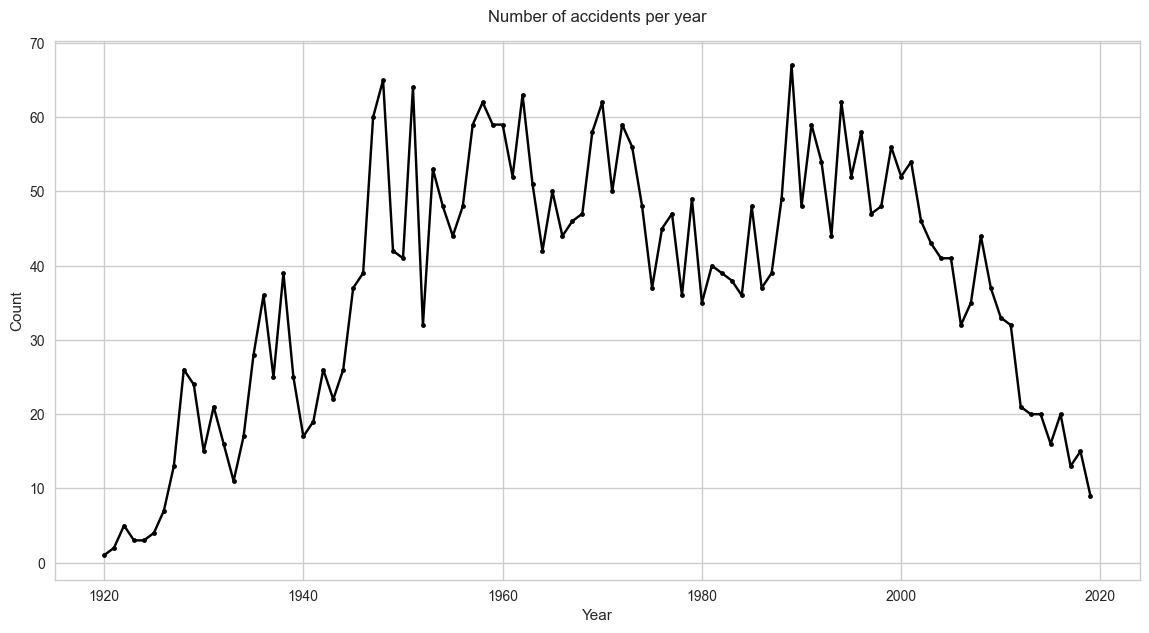

In [133]:
#showing the number of accidents per year
plt.figure(figsize = (14,7))
plt.style.use('seaborn-whitegrid')
plt.plot(by_year.index,'No',data = by_year,color = 'k', marker = '.')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of accidents per year', y= 1.02)
plt.show()

In [134]:
by_month = dataset.groupby('Month')[['No']].count()
by_month

,No
Month,
1,350
2,272
3,333
4,252
5,269
6,267
7,315
8,349
9,349


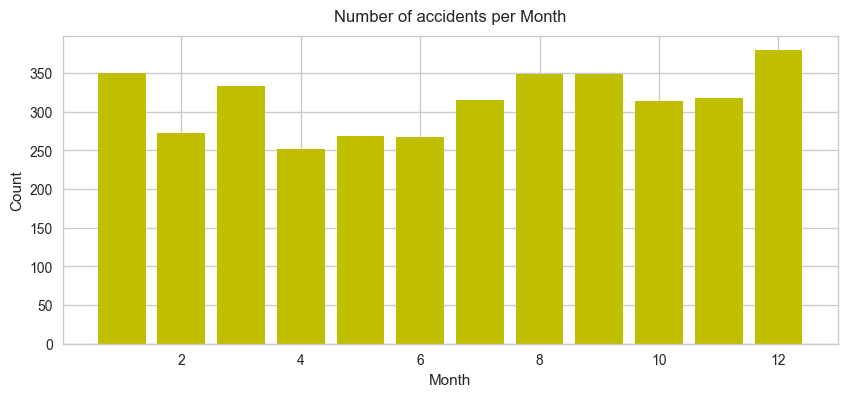

In [135]:
##showing the number of accidents per month
plt.figure(figsize = (10,4))
plt.style.use('fast')
plt.bar(by_month.index,'No',data = by_month,color = 'y')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of accidents per Month', y= 1.02)
plt.show()

In [136]:
by_day_of_week = dataset.groupby('Week-Day')[['No']].count()
by_day_of_week

,No
Week-Day,
0,517
1,553
2,560
3,566
4,570
5,545
6,454


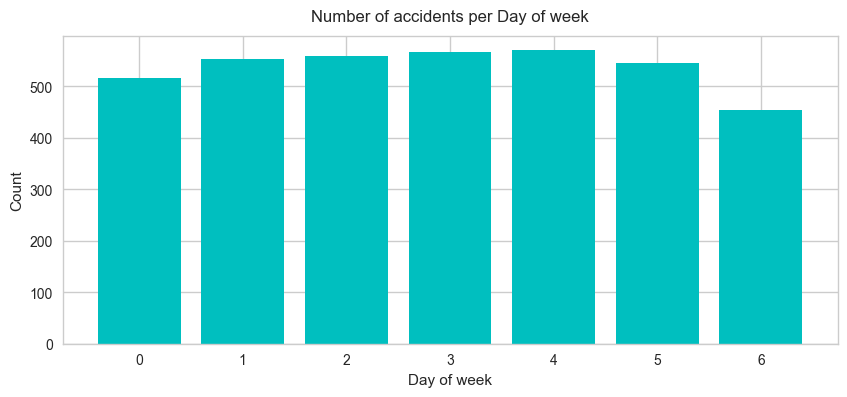

In [137]:
##showing the number of accidents per day of week
plt.figure(figsize = (10,4))
plt.style.use('fast')
plt.bar(by_day_of_week.index,'No',data = by_day_of_week,color = 'c')
plt.xlabel('Day of week')
plt.ylabel('Count')
plt.title('Number of accidents per Day of week', y= 1.02)
plt.show()

In [138]:
df = dataset.groupby('Year').sum()
df

,Month,Week-Day,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,No,Survivors
Year,,,,,,,,,,,
1920,12,1,8.0,6.0,2.0,4.0,2.0,2.0,0.0,0,4.0
1921,21,1,7.0,4.0,3.0,7.0,4.0,3.0,0.0,3,0.0
1922,39,21,20.0,14.0,6.0,20.0,14.0,6.0,0.0,25,0.0
1923,22,4,22.0,16.0,6.0,12.0,8.0,4.0,0.0,27,10.0
1924,22,11,16.0,12.0,4.0,16.0,12.0,4.0,0.0,36,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2015,131,51,749.0,674.0,75.0,712.0,640.0,72.0,21.0,59192,37.0
2016,126,53,802.0,706.0,96.0,485.0,411.0,74.0,1.0,74350,317.0
2017,91,34,116.0,84.0,32.0,86.0,63.0,23.0,35.0,48542,30.0


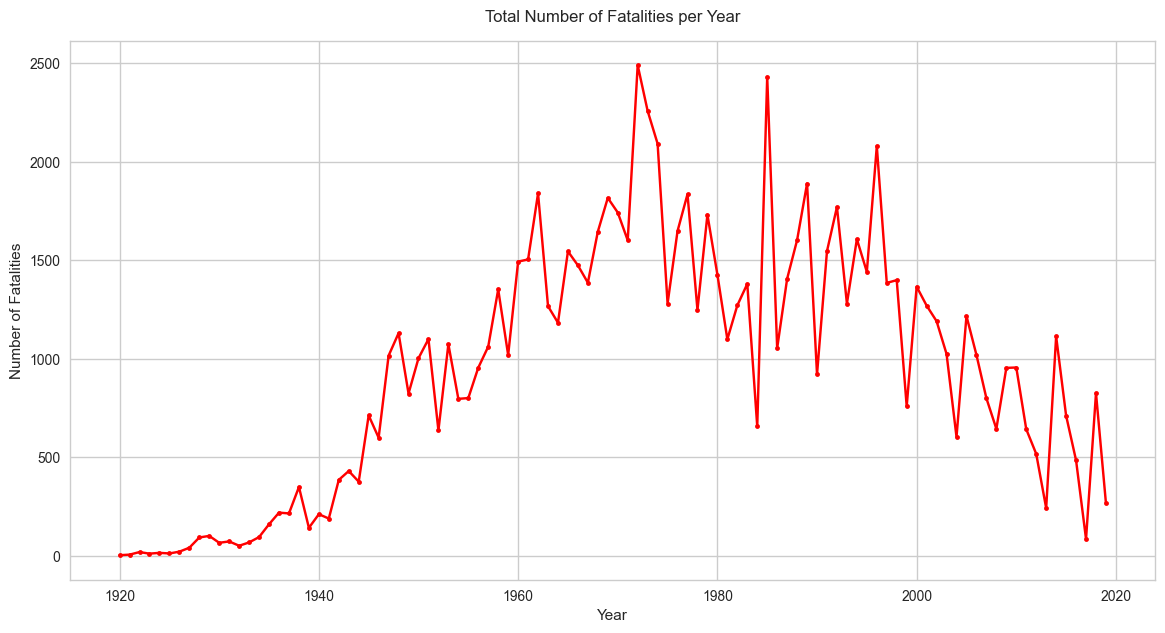

In [139]:
#showing the number of fatalities per year
plt.figure(figsize = (14,7))
plt.style.use('fast')
plt.plot(df.index,'Fatalities',data = df,color = 'r', marker = '.')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.title('Total Number of Fatalities per Year', y= 1.02)
plt.show()

In [140]:
df['Proportion'] = df['Fatalities']/df['Aboard']
df

,Month,Week-Day,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,No,Survivors,Proportion
Year,,,,,,,,,,,,
1920,12,1,8.0,6.0,2.0,4.0,2.0,2.0,0.0,0,4.0,0.500000
1921,21,1,7.0,4.0,3.0,7.0,4.0,3.0,0.0,3,0.0,1.000000
1922,39,21,20.0,14.0,6.0,20.0,14.0,6.0,0.0,25,0.0,1.000000
1923,22,4,22.0,16.0,6.0,12.0,8.0,4.0,0.0,27,10.0,0.545455
1924,22,11,16.0,12.0,4.0,16.0,12.0,4.0,0.0,36,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,131,51,749.0,674.0,75.0,712.0,640.0,72.0,21.0,59192,37.0,0.950601
2016,126,53,802.0,706.0,96.0,485.0,411.0,74.0,1.0,74350,317.0,0.604738
2017,91,34,116.0,84.0,32.0,86.0,63.0,23.0,35.0,48542,30.0,0.741379


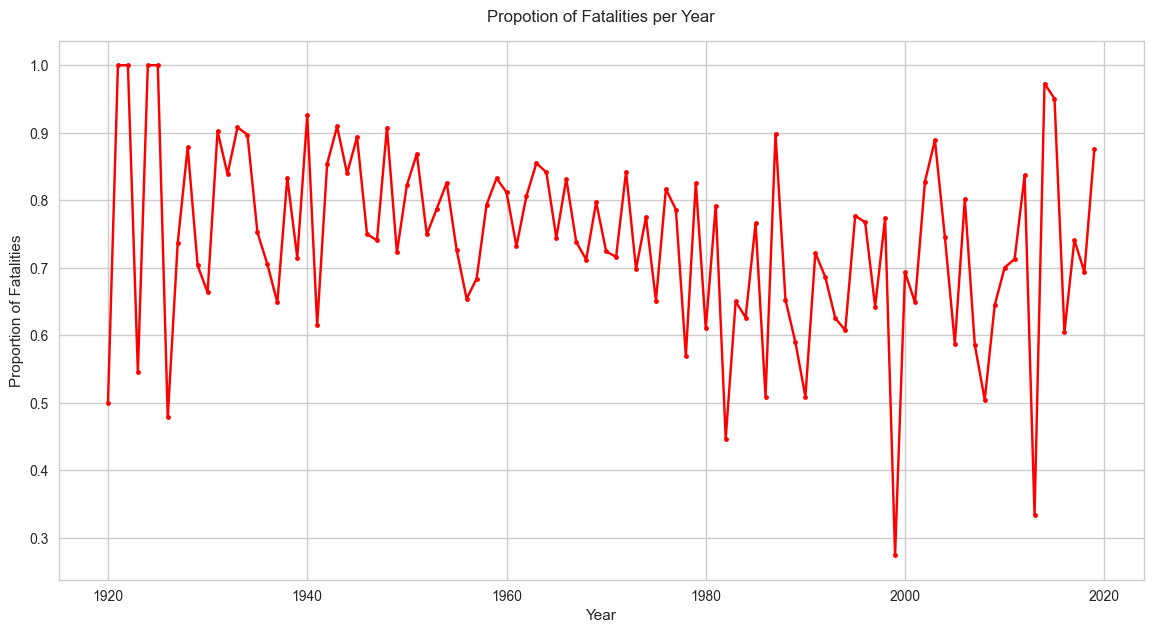

In [141]:
#showing the proportion of fatalities per year
plt.figure(figsize = (14,7))
plt.style.use('fast')
plt.plot(df.index,'Proportion',data = df,color = 'r', marker = '.')
plt.xlabel('Year')
plt.ylabel('Proportion of Fatalities')
plt.title('Propotion of Fatalities per Year', y= 1.02)
plt.show()

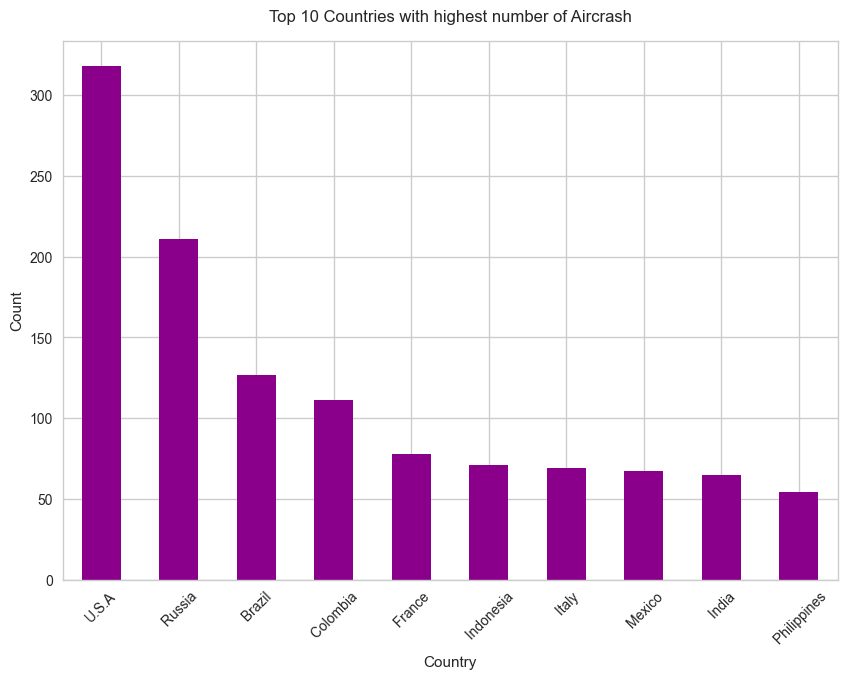

In [142]:
#showing the top 10 countries with the highest number of accidents
plt.figure(figsize = (10,7))
plt.style.use('tableau-colorblind10')
dataset.Country.value_counts()[:10].sort_values(ascending=False).plot(kind='bar', color ='darkmagenta')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.title('Top 10 Countries with highest number of Aircrash', y= 1.02)
plt.show()

In [143]:
df1 = dataset.groupby('Country').sum().sort_values(by= 'Fatalities',ascending = False)[:20]
df1

,Year,Month,Week-Day,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,No,Survivors
Country,,,,,,,,,,,,
Russia,417728,1563,681,9444.0,8130.0,1331.0,7311.0,6187.0,1122.0,87.0,457348,2133.0
U.S.A,627069,2152,952,10023.0,8760.0,1263.0,5487.0,4675.0,901.0,5592.0,573971,4536.0
Brazil,250274,872,354,3697.0,3163.0,534.0,2528.0,2117.0,414.0,61.0,219970,1169.0
Colombia,219727,694,325,2610.0,2179.0,431.0,2244.0,1858.0,386.0,38.0,239110,366.0
Indonesia,141494,431,184,3134.0,2796.0,338.0,2085.0,1813.0,272.0,74.0,197561,1049.0
India,128119,409,167,2408.0,2058.0,350.0,1918.0,1625.0,293.0,39.0,112781,490.0
France,152677,520,210,2230.0,1877.0,352.0,1687.0,1389.0,297.0,23.0,90258,543.0
Iran,63691,196,88,2089.0,1853.0,236.0,1408.0,1238.0,190.0,34.0,85253,681.0
USSR,67177,244,101,1812.0,1637.0,185.0,1396.0,1238.0,163.0,0.0,67627,416.0


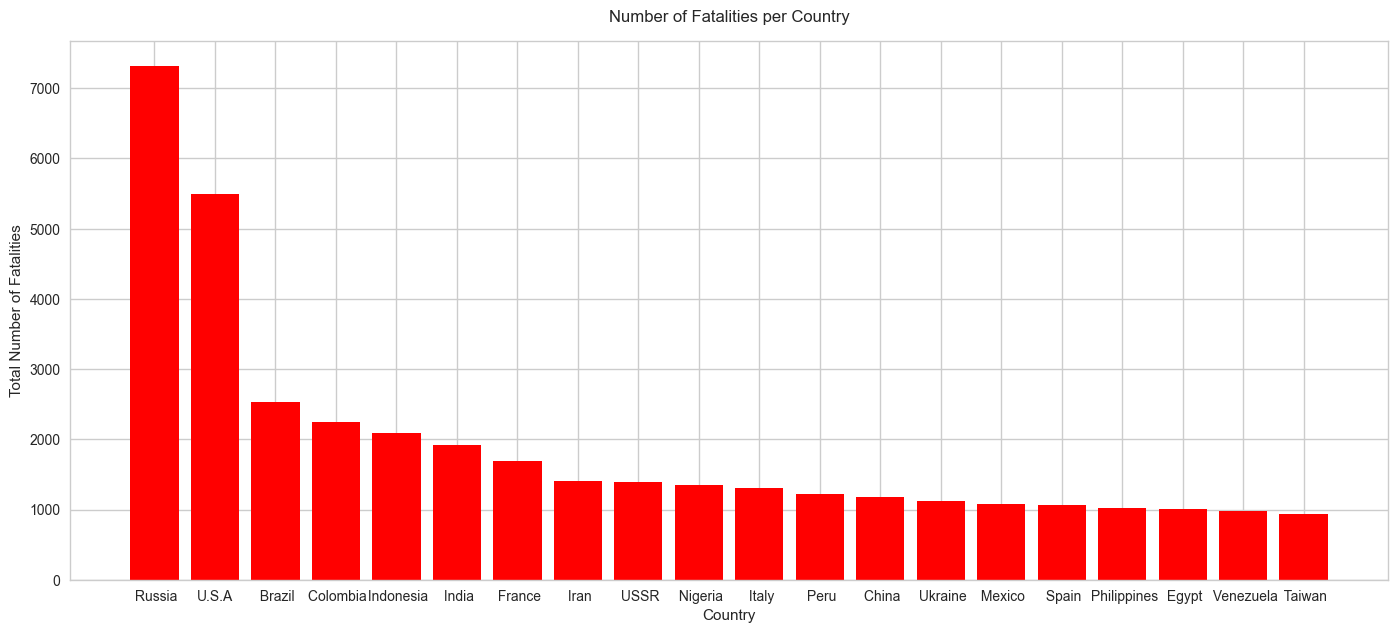

In [144]:
#showing the top 20 countries with the highest number of fatalities
plt.figure(figsize = (17,7))
plt.style.use('fast')
plt.bar(df1.index,'Fatalities',data = df1,color = 'r')
plt.xlabel('Country')
plt.ylabel('Total Number of Fatalities')
plt.title('Number of Fatalities per Country', y= 1.02)
plt.show()

In [145]:
df2 = dataset.groupby('Country').sum().sort_values(by= 'Survivors',ascending = False)[:20]
df2

,Year,Month,Week-Day,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,No,Survivors
Country,,,,,,,,,,,,
U.S.A,627069,2152,952,10023.0,8760.0,1263.0,5487.0,4675.0,901.0,5592.0,573971,4536.0
Russia,417728,1563,681,9444.0,8130.0,1331.0,7311.0,6187.0,1122.0,87.0,457348,2133.0
Japan,51273,151,58,1986.0,1814.0,172.0,785.0,671.0,114.0,0.0,46607,1201.0
Brazil,250274,872,354,3697.0,3163.0,534.0,2528.0,2117.0,414.0,61.0,219970,1169.0
China,65352,253,93,2316.0,2080.0,236.0,1184.0,1065.0,119.0,9.0,72437,1132.0
Indonesia,141494,431,184,3134.0,2796.0,338.0,2085.0,1813.0,272.0,74.0,197561,1049.0
Philippines,106797,358,153,1986.0,1755.0,231.0,1023.0,882.0,141.0,28.0,111937,963.0
Spain,82359,286,116,1825.0,1636.0,189.0,1065.0,919.0,146.0,2.0,56843,760.0
South Korea,15887,51,21,945.0,882.0,63.0,244.0,221.0,23.0,0.0,19717,701.0


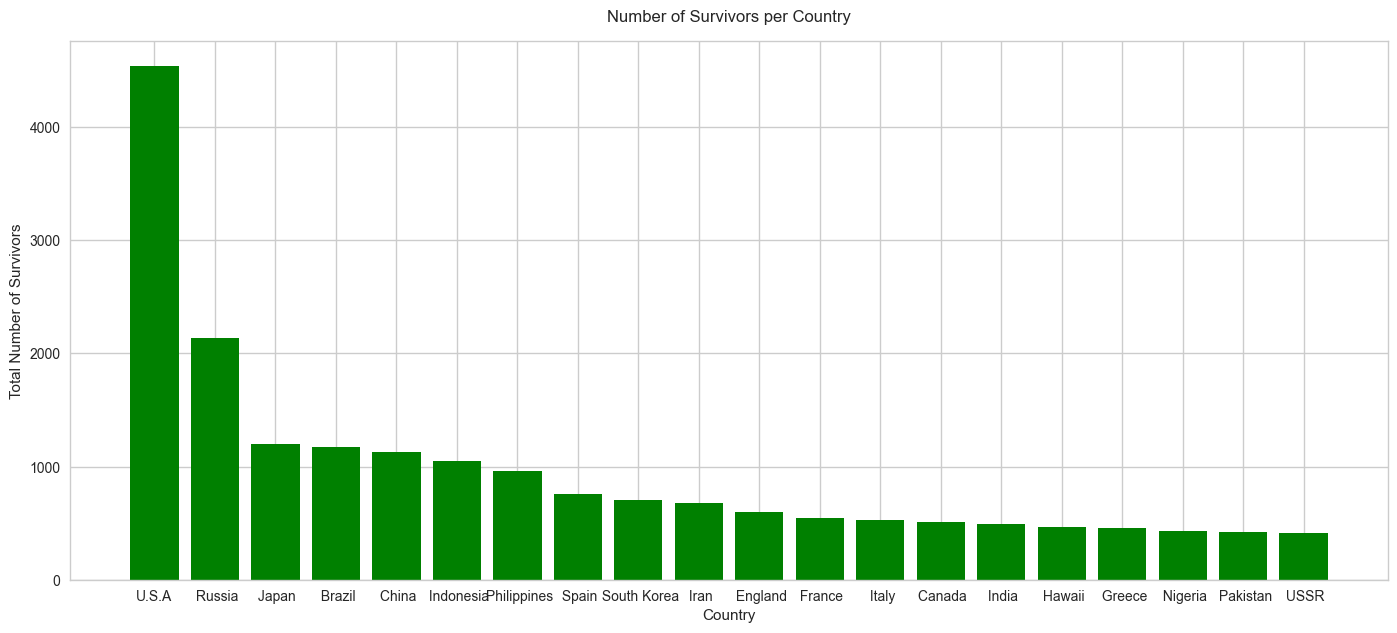

In [146]:
#showing the top 20 countries with the highest number of Survivors
plt.figure(figsize = (17,7))
plt.style.use('fast')
plt.bar(df2.index,'Survivors',data = df2,color = 'g')
plt.xlabel('Country')
plt.ylabel('Total Number of Survivors')
plt.title('Number of Survivors per Country', y= 1.02)
plt.show()

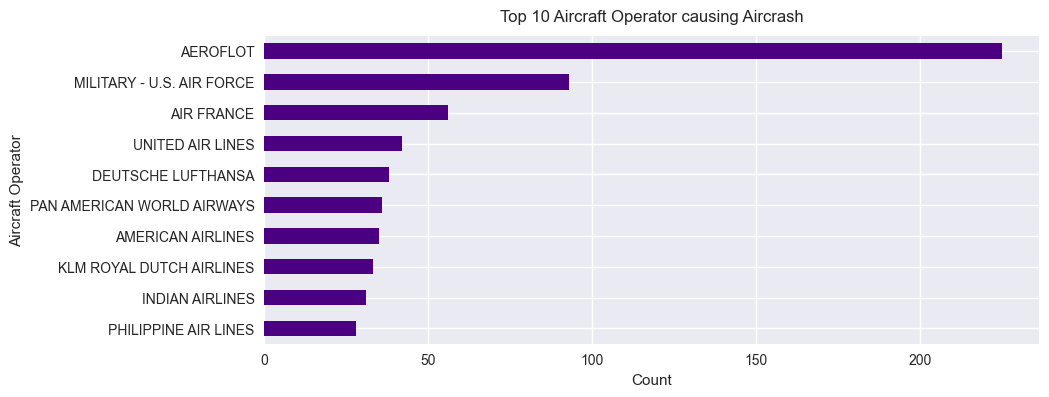

In [147]:
#showing the top 10 aircraft operators with the highest number of accidents
plt.figure(figsize = (10,4))
plt.style.use('seaborn')
dataset.Operator.value_counts()[:10].sort_values(ascending=True).plot(kind='barh', color ='indigo')
plt.xlabel('Count')
plt.ylabel('Aircraft Operator')
plt.title('Top 10 Aircraft Operator causing Aircrash', y= 1.02)
plt.show()

In [148]:
df3 = dataset.groupby('Operator').sum().sort_values(by= 'Survivors',ascending = False)[:10]
df3

,Year,Month,Week-Day,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,No,Survivors
Operator,,,,,,,,,,,,
AEROFLOT,443496,1588,736,10411.0,9104.0,1345.0,8170.0,7056.0,1127.0,35.0,396203,2241.0
PAN AMERICAN WORLD AIRWAYS,70544,250,114,3019.0,2692.0,337.0,1265.0,1091.0,173.0,20.0,43348,1754.0
UNITED AIR LINES,82230,330,111,2398.0,2188.0,210.0,1014.0,884.0,130.0,2753.0,47803,1384.0
PHILIPPINE AIR LINES,55182,178,91,1367.0,1235.0,132.0,435.0,373.0,62.0,14.0,48740,932.0
AIR FRANCE,109453,368,122,2594.0,2243.0,351.0,1704.0,1424.0,280.0,5.0,54411,890.0
TRANS WORLD AIRLINES,33487,133,52,1577.0,1448.0,129.0,784.0,707.0,77.0,8.0,28821,793.0
CHINA AIRLINES (TAIWAN),25813,76,42,1574.0,1434.0,140.0,831.0,743.0,88.0,7.0,31925,743.0
KOREAN AIRLINES,19844,78,31,1449.0,1324.0,125.0,712.0,641.0,71.0,4.0,23980,737.0
GARUDA INDONESIA AIRLINES,29698,79,45,1146.0,1043.0,103.0,538.0,478.0,60.0,2.0,32671,608.0


<Figure size 1000x400 with 0 Axes>

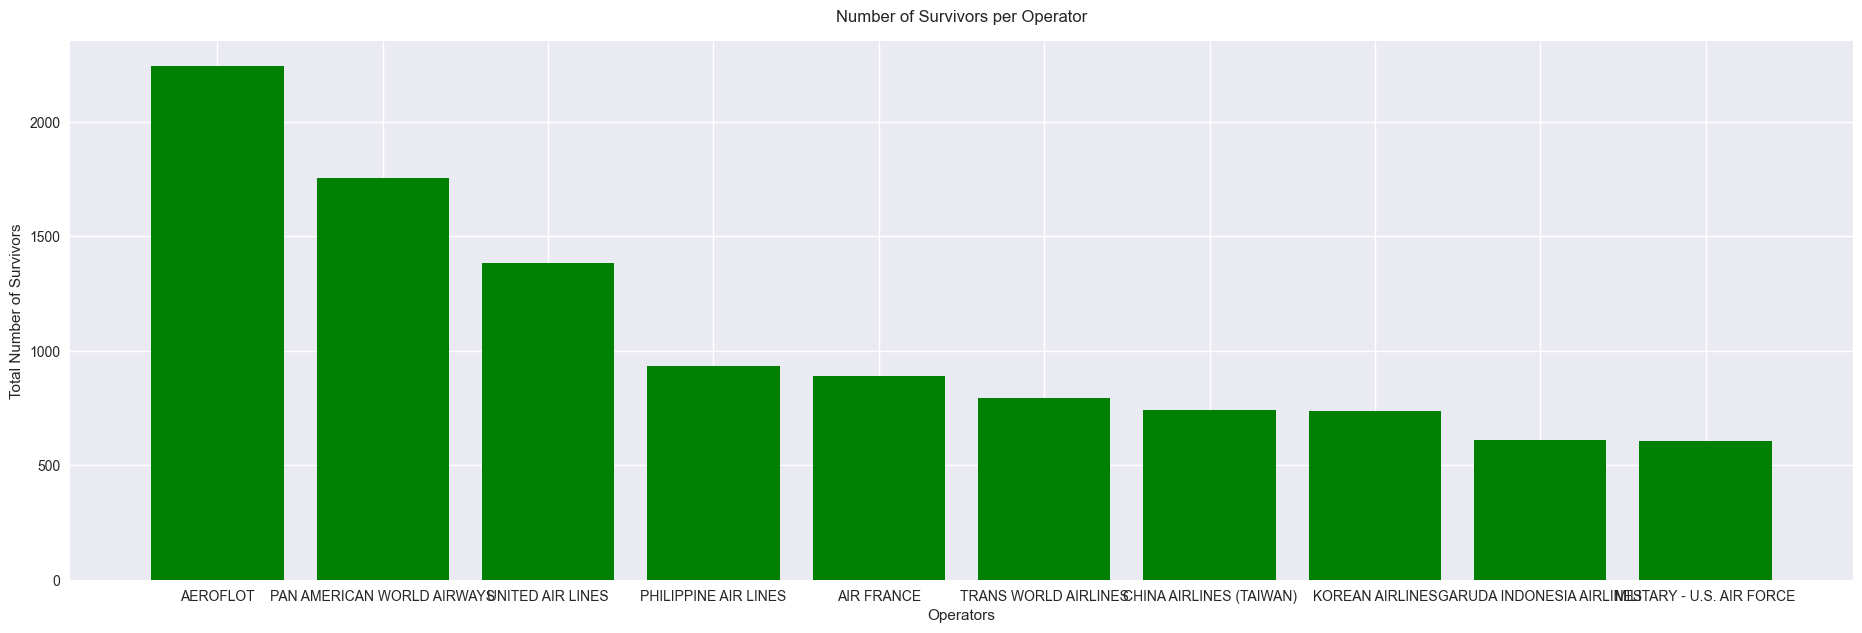

In [149]:
#showing the top 10 aircraft operators with the highest number of aircrash survivor
plt.figure(figsize = (10,4))
plt.figure(figsize = (23,7))
plt.style.use('fast')
plt.bar(df3.index,'Survivors',data = df3,color = 'g')
plt.xlabel('Operators')
plt.ylabel('Total Number of Survivors')
plt.title('Number of Survivors per Operator', y= 1.02)
plt.show()

<Figure size 1000x400 with 0 Axes>

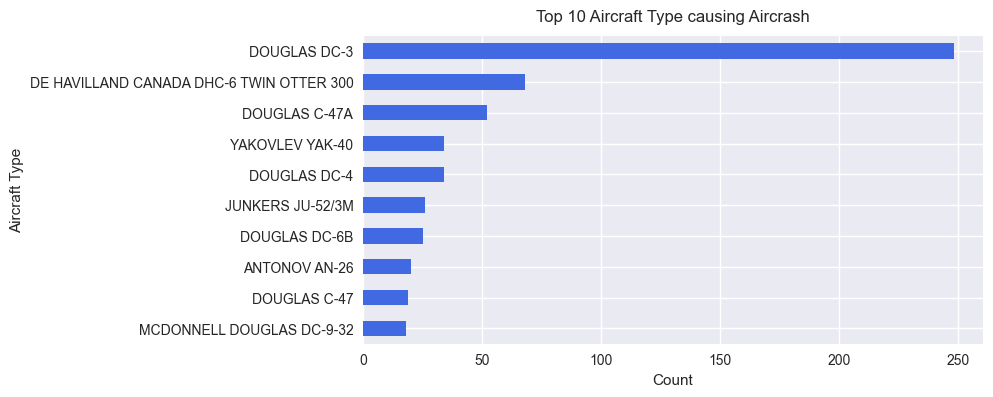

In [150]:
##showing the top 10 aircraft type with the highest number of accidents
plt.figure(figsize = (10,4))
plt.figure(figsize = (8,4))
plt.style.use('seaborn')
dataset['AC Type'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh', color ='royalblue')
plt.xlabel('Count')
plt.ylabel('Aircraft Type')
plt.title('Top 10 Aircraft Type causing Aircrash', y= 1.02)
plt.show()

In [151]:
text = str(dataset.Summary.tolist())
stopwords = set(STOPWORDS)
stopwords.add('airport')
stopwords.add('plane')
stopwords.add('crashed')
stopwords.add('flight')
stopwords.add('aircraft')
word_cloud=WordCloud(background_color='white',stopwords=stopwords).generate(text)

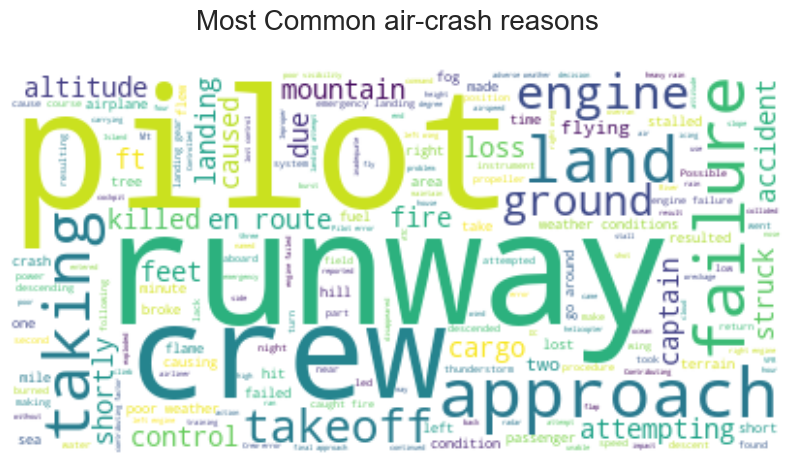

In [152]:
plt.figure(figsize=(10,10))
plt.title('Most Common air-crash reasons', y=1.08, fontsize = 20)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()